#**Author : Suleman Sayyed** <br>    
###**Intern @ GRIP Spark Foundation** <br>


$\color{red}{\text{Task No.1 - Prediction using Supervised Machine Learning  }}$ <br>


*   <a href="#linearity">We would be **predicting the marks of student** based on the number of hours the student invests on studying by using **Linear Regression Algorithm**
*   We will be using simple linear regression to build our model and to make predictions.This is a **simple linear regression** task as it involves just 2 variables.





Table of Content

<a href="#linearity">$\color{green}{\text{1. Importing libraries}}$ <br>
<a href="#linearity">$\color{green}{\text{2. Reading the data from source }}$<br>
<a href="#linearity">$\color{green}{\text{3. Input data Visualization}}$ <br>
<a href="#linearity">$\color{green}{\text{4. Data Preprocessing}}$ <br>
<a href="#linearity">$\color{green}{\text{5. Model Training}}$ <br>
<a href="#linearity">$\color{green}{\text{6. Plotting the Line of Regression}}$ <br>
<a href="#linearity">$\color{green}{\text{7. Predictions}}$ <br>
<a href="#linearity">$\color{green}{\text{8. Actual result v/s Predicted Model result}}$ <br>
<a href="#linearity">$\color{green}{\text{9. Evaluating the model}}$ <br>


<a href="#linearity">$\color{orange}{\text{Technical Stack : Sikit Learn, Numpy, Pandas, Matplotlib }}$<br>

#**Step No. 1** <br>
**Importing Neccessary Libraries**

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
%matplotlib inline

#**Step No.2**

In [82]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print(df)
print("Data imported successfully")
df.head()

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#**Step No.3**

In [83]:
print("Info of the data")
print(df.describe())
print("shape of the data -",df.shape)


Info of the data
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
shape of the data - (25, 2)


###**Correlation between Hours and Scores**

In [84]:
corr=df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


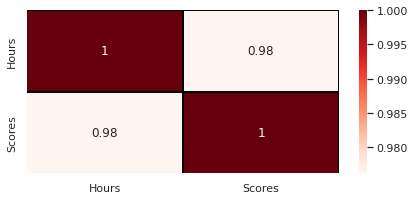

In [85]:
fig, ax = plt.subplots(figsize=(7,3))
sns.set(font_scale=1)
ax = sns.heatmap(corr, cmap = 'Reds',annot = True, linewidths=0.5, linecolor='black')
plt.show()

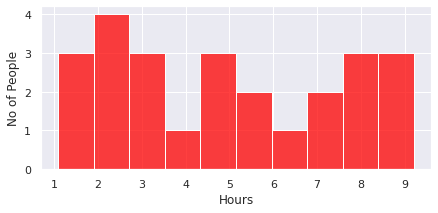

In [86]:
fig,ax= plt.subplots(figsize=(7,3))
sns.set(font_scale=1)
ax = sns.histplot(df['Hours'],bins=10,color=['red'])
ax.set_xlabel('Hours')
ax.set_ylabel('No of People')
plt.show()

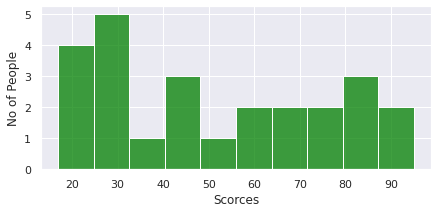

In [87]:
fig,ax= plt.subplots(figsize=(7,3))
sns.set(font_scale=1)
ax = sns.histplot(df['Scores'],bins=10,color=['Green'])
ax.set_xlabel('Scorces')
ax.set_ylabel('No of People')
plt.show()

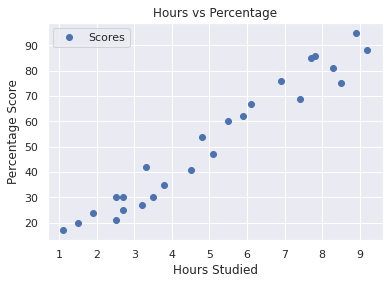

In [88]:
# Plotting the distribution of scores

df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From above graph we can see that it shows positive linear relation betwn 2 parameters(hours & score)**

#**Step No. 4**
<br>**division of data into "attributes" (inputs) and "labels" (outputs).**

In [89]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

#**Step No. 5**
<br>**Splitting the data into training and testing sets**

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [91]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)

print("model training successfull")


model training successfull


In [92]:
accuracy = model.score(X_test, y_test)
print("Training Accuracy = ", accuracy)

Training Accuracy =  0.9454906892105354


#**Step No. 6**
<br>**Best fit line of regression**

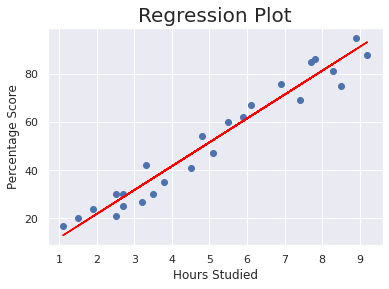

In [93]:
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.title('Regression Plot',size = 20)
plt.ylabel('Percentage Score', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.plot(X, line,color='red');
plt.show()

#**Steps No. 7**
**Prediction**

In [94]:
print("test data",X_test) 
y_pred = model.predict(X_test)



test data [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#**Step No. 8**

In [95]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [96]:
print("Test Score =",model.score(X_test,y_test))

Test Score = 0.9454906892105354


**Graphical View of actual v/s predicted**

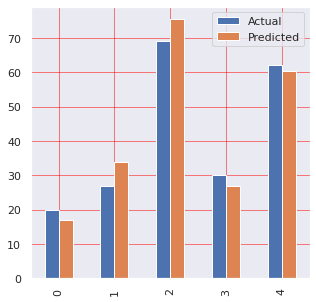

In [97]:
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

**Now testing model with our own data**

In [98]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own = model.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


so here for 9.25 hrs study, student can score 93.69 according to our model.

#**Step No. 9**

In [99]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


**R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.**

#**Conclusion :**
<br>

**Here I successfully completed Prediction using Supervised ML task and was able to evaluate the model's performance.**

<br>


<a href="#linearity">$\color{orange}{\text{Thanks for watching 😊 }}$<br>